## Reconnaître de quel type de vêtements il s'agit

ressources : https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb

ouverture et analyse des data

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow import keras 
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [10]:
X_train_valid = X_train[55000:]
y_train_valid = y_train[55000:]
X_train = X_train[0:55000]
y_train = y_train[0:55000]

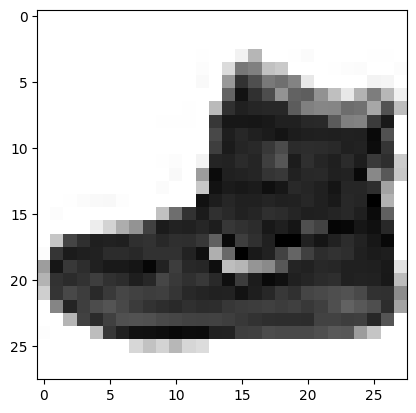

In [11]:
plt.imshow(X_train[0],cmap="binary")

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train,X_train_valid,X_test = X_train/255, X_train_valid/255, X_test/255

<p style='color : green'>extra code – shows how to convert class ids to one-hot vectors</p>

In [13]:

v = [0, 5, 1, 0]
v=tf.keras.utils.to_categorical(v, num_classes=10)
print(v)
print([np.argmax(i) for i in v])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0, 5, 1, 0]


Visualisation du type de donées ( on retrouve le nom des classes sur le site de keras)

In [14]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
print(class_names[y_train[0]])
print(y_train[:5]) # 5 premiers éléments de y

Ankle boot
[9 0 0 3 0]


Classification model

In [15]:
tf.random.set_seed(42)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')]
)



Infos sur le modèle

In [16]:
model.summary()
print('////////////')
print(model.layers)
print('////////////')
hidden1 = model.layers[1]
hidden1.name

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
////////////
[<keras.src.layers.reshaping.flatten.Flatten object at 0x000001C66428C610>, <keras.src.layers.core.dense.Dense object at 0x000001C6660B48E0

'dense'

Avoir les poids des couches:

In [17]:
W,b = hidden1.get_weights()
W.shape,b.shape

((784, 300), (300,))

On compile le modèle :

In [18]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

On entraîne le modèle

In [19]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_train_valid,y_train_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7091 - accuracy: 0.7675 - val_loss: 0.5081 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4852 - accuracy: 0.8323 - val_loss: 0.4550 - val_accuracy: 0.8356
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4394 - accuracy: 0.8465 - val_loss: 0.4205 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4144 - accuracy: 0.8549 - val_loss: 0.3968 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3941 - accuracy: 0.8609 - val_loss: 0.3893 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3776 - accuracy: 0.8673 - val_loss: 0.3946 - val_accuracy: 0.8626
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3651 - accuracy: 0.8701 - val_loss: 0.3730 - val_accuracy:

<p style='color : green'>extra code – Si on n'avait pas divisé le training_set en train et validation, on aurait pu indiquer la part du set d'entraînement qui sert à la validation comme ceci:</p>

model.fit(X_train,y_train,epochs=5,validation_split=0.1)
#ici, on le validation_set représente 10% du set total

In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.8830


[0.3254634141921997, 0.8830000162124634]

In [27]:
import numpy as np
y_pred = model.predict(X_test)
print(y_pred[0])
print('vraie :',y_test[0:3],' // prédite :',[np.argmax(i) for i in y_pred[0:3]])

313/313 [==============================] - 1s 2ms/step
[2.3490105e-05 6.1615572e-07 2.6727128e-05 8.9542336e-06 5.3337490e-06
 2.8782284e-03 1.3703238e-05 2.1306258e-02 2.2966461e-04 9.7550696e-01]
vraie : [9 2 1]  // prédite : [9, 2, 1]


# Visualisation des données de notre entraînement
Attention : les données de validation sont calculées à la fin d'une époque alors que c'est calculé pendant l'époque pour les données d'entraînement.
il faut visualiser les courbes en déplaçant les courbes de validation de 1/2 époque vers la droite.
Pour le faire, aller à https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb cellule 43

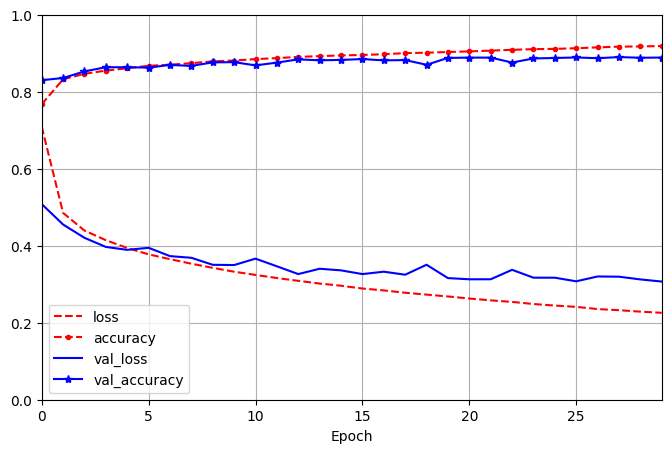

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()